# Demonstration of TEAMS software via example of Lorenz-96

## Part 1: running the model freely

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from pprint import pprint

In [2]:
import lorenz96; reload(lorenz96)

<module 'lorenz96' from '/orcd/home/001/ju26596/rare_event_simulation/TEAMS/examples/lorenz96/lorenz96.py'>

In [3]:
cfg_ode = lorenz96.Lorenz96ODE.default_config()
pprint(cfg_ode)

{'F': 6.0,
 'K': 40,
 'dt_save': 0.01,
 'dt_step': 0.001,
 'frc': {'impulsive': {'site_magnitudes': [],
                       'sites': [],
                       'wavenumber_magnitudes': [0.01],
                       'wavenumbers': [4]},
         'type': 'impulsive'},
 't_burnin_phys': 10.0}


In [4]:
ode = lorenz96.Lorenz96ODE(cfg_ode)

In [5]:
tp_init = 0.0
t_init = int(round(tp_init/ode.dt_save))
x_init = ode.generate_default_init_cond(t_init)
x_dt_init = ode.tendency(t_init, x_init)

Text(0.5, 0, '$k$')

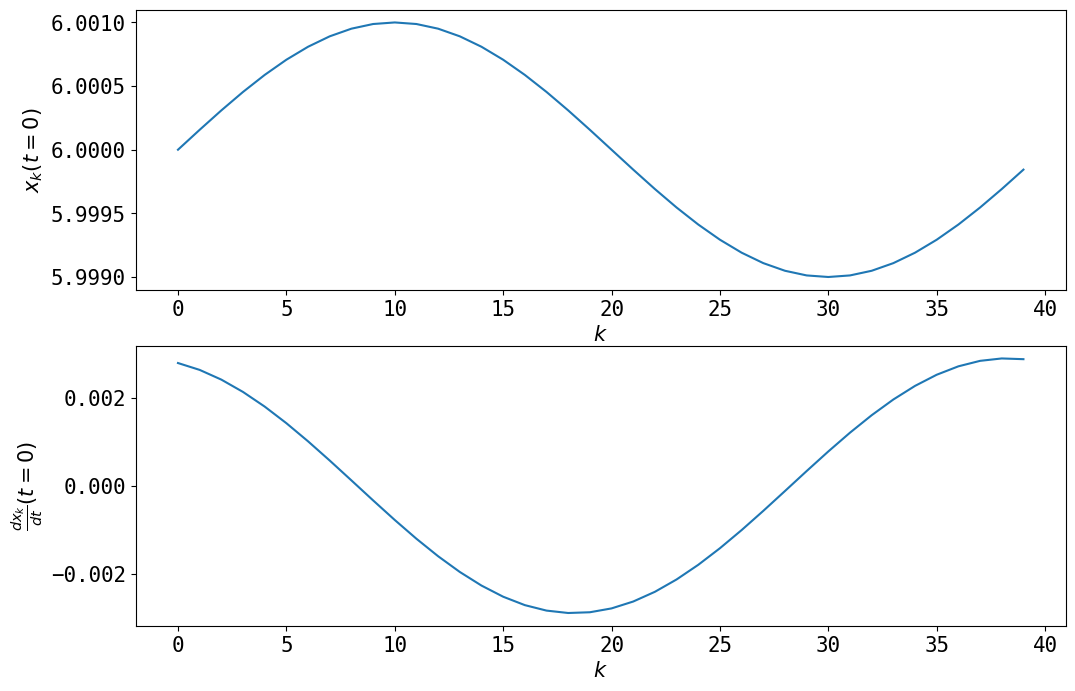

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
ax = axes[0]
ax.plot(np.arange(ode.K), x_init)
ax.set_ylabel(r"$x_k(t=0)$")
ax.set_xlabel(r"$k$")
ax = axes[1]
ax.plot(np.arange(ode.K), x_dt_init)
ax.set_ylabel(r"$\frac{dx_k}{dt}(t=0)$")
ax.set_xlabel(r"$k$")


Integrate forward for a short time, just enough to see the instability

In [37]:
tp_fin = 20.0
t_fin = int(round(tp_fin/ode.dt_save))
t_save,x_save = ode.run_trajectory_unperturbed(x_init, t_init, t_fin, "rk4")
tp_save = t_save * ode.dt_save
Nt_save = len(t_save)

x_save.shape = (2000, 40)


Text(0, 0.5, '$x_k(t)$')

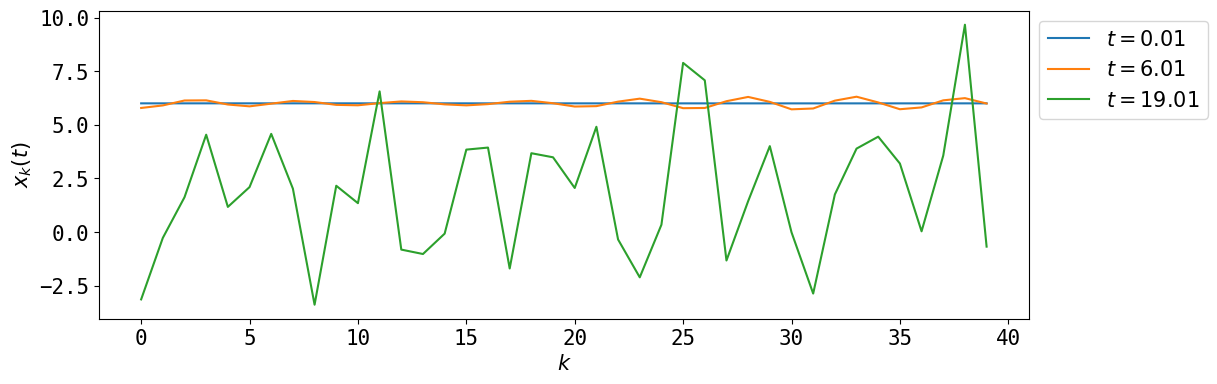

In [39]:
fig,ax = plt.subplots(figsize=(12,4))
handles = []
tps_plot = np.array([0.0, 6.0, 19.0])
tidx_plot = ((tps_plot-tp_init)/ode.dt_save).astype(int)
for i_t in tidx_plot:
    h, = ax.plot(np.arange(ode.K), x_save[i_t], label=r"$t = %.2f$"%(tp_save[i_t]))
    handles.append(h)
ax.legend(handles=handles,bbox_to_anchor=(1,1),loc="upper left")
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$x_k(t)$")

Text(0.5, 1.0, '$x_k(t)$')

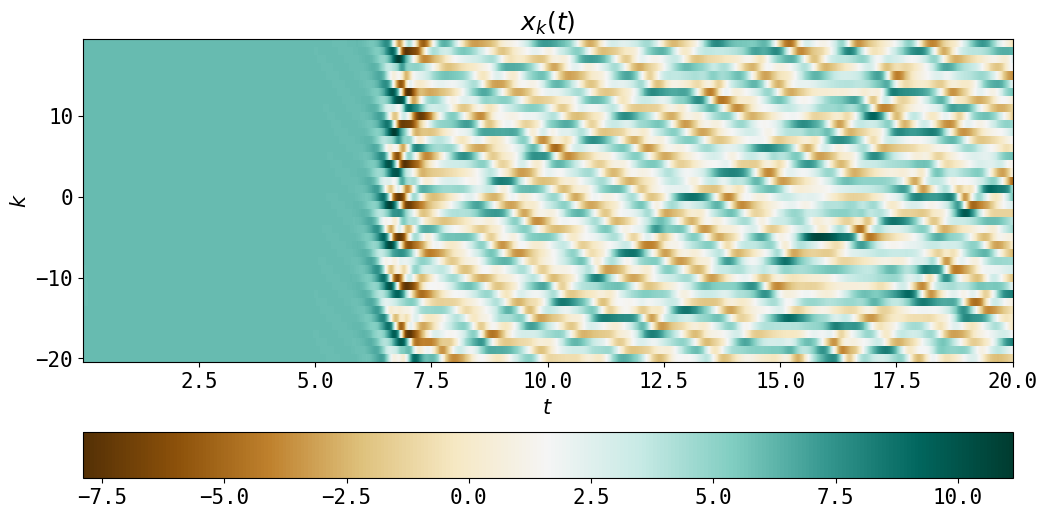

In [43]:
fig,ax = plt.subplots(figsize=(12,6))
img = ode.plot_hovmoller(t_save, x_save, fig, ax)
fig.colorbar(img, ax=ax, orientation="horizontal")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$k$")
ax.set_title("$x_k(t)$")

## Part 2: running the model forced by white noise

In [47]:
cfg_sde = lorenz96.Lorenz96SDE.default_config()
pprint(cfg_sde)

{'frc': {'type': 'white',
         'white': {'site_magnitudes': [],
                   'sites': [],
                   'wavenumber_magnitudes': [0.25],
                   'wavenumbers': [4]}},
 'ode': {'F': 6.0,
         'K': 40,
         'dt_save': 0.01,
         'dt_step': 0.001,
         'frc': {'impulsive': {'site_magnitudes': [],
                               'sites': [],
                               'wavenumber_magnitudes': [0.01],
                               'wavenumbers': [4]},
                 'type': 'impulsive'},
         't_burnin_phys': 10.0},
 'seed_max': 100000,
 'seed_min': 1000}


In [48]:
sde = lorenz96.Lorenz96SDE(cfg_sde)

In [ ]:
sde.

## Part 3: kick the model occasionally using Forcing objects

## Part 4: Manage ensemble members through an Ensemble object

## Part 5: Define a rule for growing an ensemble through an Algorithm object